# Understand the data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
%matplotlib inline

In [20]:
# read the data
# data = pd.read_csv('closing_prices_cleaned.csv')
data = pd.read_csv('closing_prices_cleaned.csv', index_col=0)

In [21]:
data.head()

,BNP FP Equity,CA FP Equity,CRH ID Equity,DAI GR Equity,BN FP Equity,DBK GR Equity,DTE GR Equity,ENEL IM Equity,ENGI FP Equity,ENI IM Equity,...,ABI BB Equity,MTS SM Equity,ASML NA Equity,G IM Equity,CS FP Equity,BBVA SM Equity,SAN SM Equity,BAS GR Equity,BAYN GR Equity,BMW GR Equity
2018-01-02 08:00:00,62.68,18.050000,29.9500,71.150000,69.95,15.901000,14.9300,5.135,14.365000,13.82,...,93.17,27.1000,145.00,15.20,24.770,7.137,5.522,92.300,104.400,86.800000
2018-01-02 08:01:00,62.64,18.061667,29.9125,71.163500,69.87,15.900667,14.9134,5.140,14.345000,13.83,...,93.18,27.0925,144.85,15.25,24.755,7.136,5.510,92.010,104.400,87.030000
2018-01-02 08:02:00,62.60,18.073333,29.8750,71.177000,69.80,15.900333,14.8968,5.140,14.330000,13.84,...,93.13,27.0850,144.50,15.26,24.775,7.139,5.505,91.996,104.400,87.260000
2018-01-02 08:03:00,62.49,18.085000,29.8375,71.153333,69.82,15.900000,14.8802,5.145,14.333333,13.86,...,93.15,27.1600,144.70,15.26,24.765,7.139,5.513,91.976,104.317,87.131333
2018-01-02 08:04:00,62.70,18.085000,29.8000,71.129667,69.58,15.925000,14.8636,5.145,14.336667,13.87,...,93.07,27.0700,144.65,15.27,24.785,7.131,5.520,91.953,104.234,87.002667


In [103]:
# tried to convert to datetime but it doesn't work!
# data.Date = pd.to_datetime(data.Date)

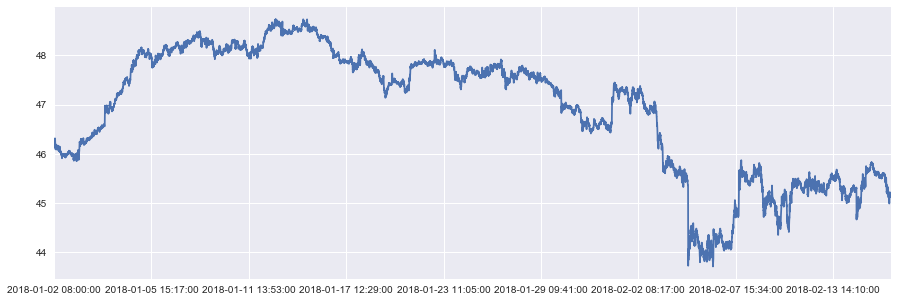

In [184]:
plt.figure(figsize=(15,5))
data['FP FP Equity'].plot()

In [22]:
# Get returns / log_returns from pricing data
# rtn = data.pct_change()[1:]
rtn = data.pct_change()
log_rtn = np.log(rtn + 1)
price = np.exp(log_rtn.cumsum()) -1

In [186]:
?data.pct_change

ValueError: could not convert string to float: '2018-02-15 16:40:00'

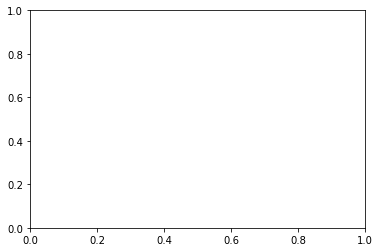

In [62]:
# function supposed to customize ticker date

'''
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot(data['Date'], data['AI FP Equity'])


ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(data['Date'].min().year, 1, 1)
datemax = datetime.date(data['Date'].max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)

# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()
'''

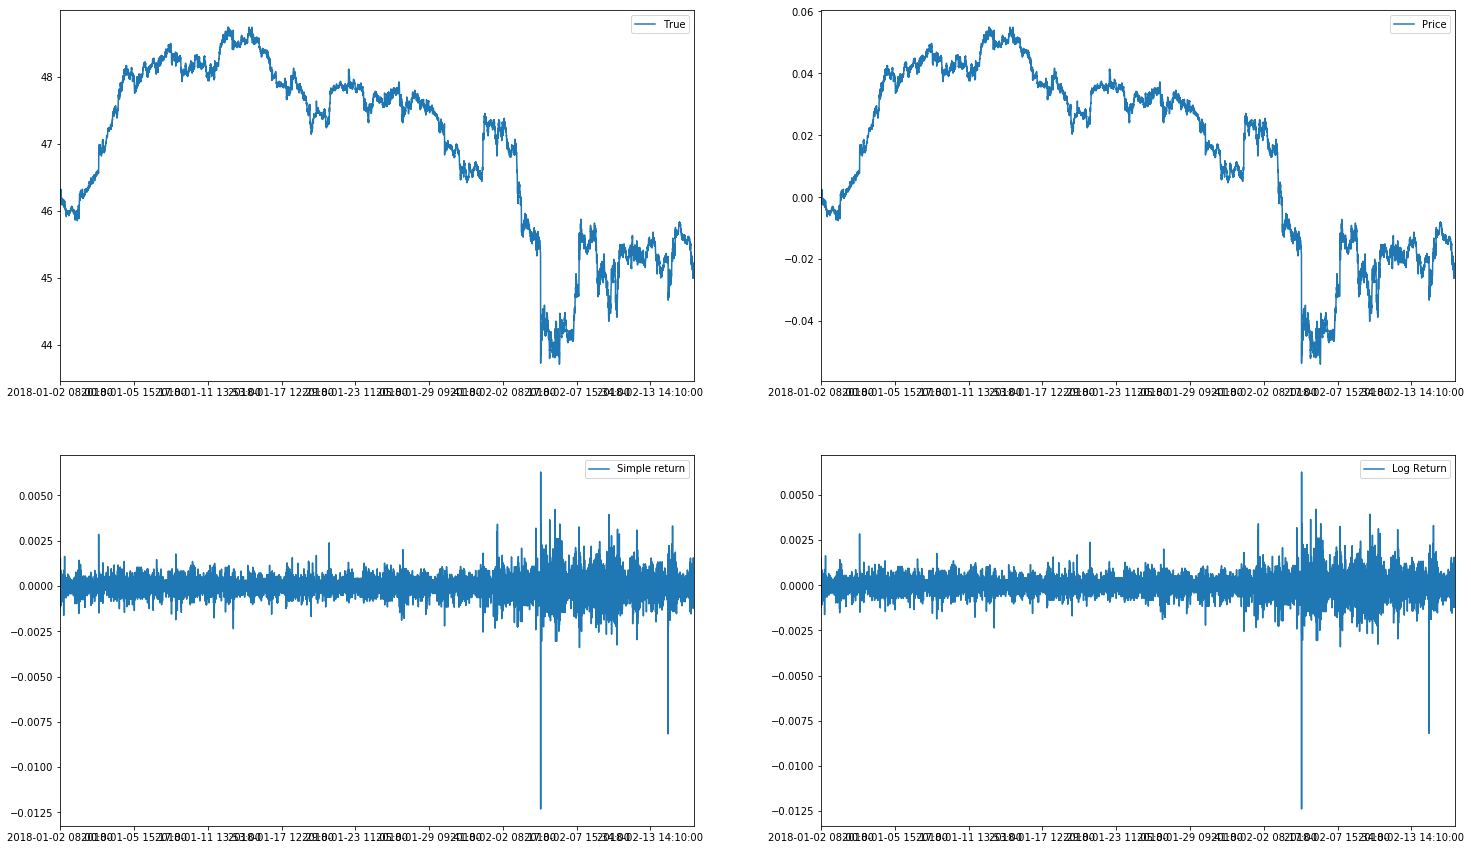

In [5]:
# some plot
plt.figure(figsize=(25,15))

plt.subplot(2, 2, 1)
data['FP FP Equity'].plot(label='True', legend=True)

plt.subplot(2, 2, 2)
price['FP FP Equity'].plot(label='Price', legend=True)

plt.subplot(2, 2, 3)
rtn['FP FP Equity'].plot(label='Simple return', legend=True)

plt.subplot(2, 2, 4)
log_rtn['FP FP Equity'].plot(label='Log Return', legend=True)


## Correlation 

Have a look at the log-return correlation 

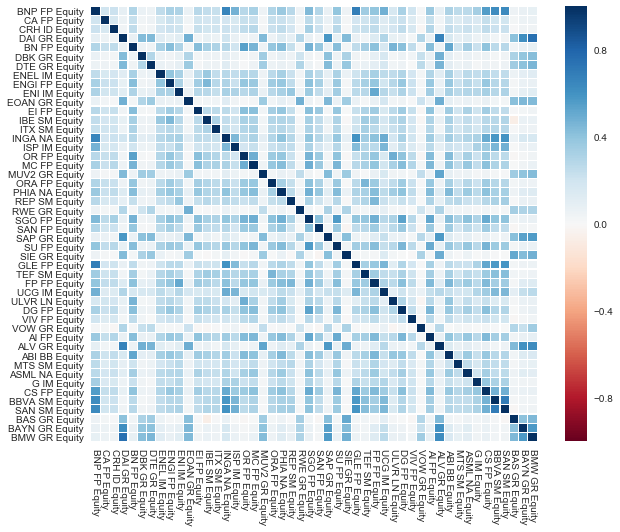

In [23]:
# use the Seaborn package to nicely visualize the correlation matrix
import seaborn as sns

# try Pearson's correlation
corrmat = log_rtn.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corrmat, 
            linewidths=0.1, 
            cmap="RdBu", 
            vmin=-1, 
            vmax=1, 
            annot=False)

plt.xticks(rotation=270);

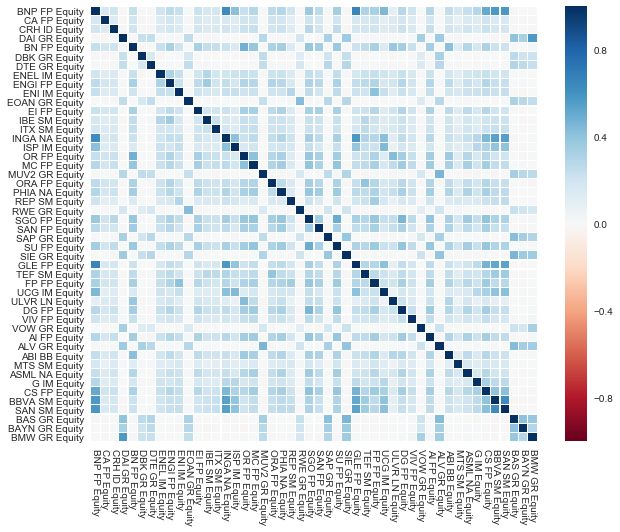

In [24]:
# use the Seaborn package to nicely visualize the correlation matrix
corrmat = log_rtn.corr(method='spearman')

plt.figure(figsize=(10,8))
# try Spearman's correlation
''' From the paper: Spearman's can represent correlations independent of outliers and non-linearities
where Pearson's cannot. Spearman's captures the monotonic relationship between continuous/ordinal variables,
while Pearson's captures only linear one.
'''
sns.heatmap(corrmat, 
            linewidths=0.1, 
            cmap="RdBu", 
            vmin=-1, 
            vmax=1, 
            annot=False)

plt.xticks(rotation=270);
#pyl.savefig('foo.jpg', bbox_inches='tight')

## Might be interesting to look at the correlation week per week

Just splitting the dataset from week1 to week2 let's say.

In [26]:
# Converting the index as date
data.index = pd.to_datetime(data.index)

In [27]:
# Extracting week & day
data['Week'] = data.index.week
data['Day'] = data.index.day

In [28]:
# Extracting week & day
log_rtn['Week'] = data.index.week
log_rtn['Day'] = data.index.day

In [37]:
#weeklyData = log_rtn[log_rtn['Week'] == 1]
#weekCorr = weeklyData.corr()
#weekCorr.loc[:'BMW GR Equity',:'BMW GR Equity']
#weekCorr.iloc[:-2,:-2]

,BNP FP Equity,CA FP Equity,CRH ID Equity,DAI GR Equity,BN FP Equity,DBK GR Equity,DTE GR Equity,ENEL IM Equity,ENGI FP Equity,ENI IM Equity,...,ABI BB Equity,MTS SM Equity,ASML NA Equity,G IM Equity,CS FP Equity,BBVA SM Equity,SAN SM Equity,BAS GR Equity,BAYN GR Equity,BMW GR Equity
BNP FP Equity,1.000000,0.223526,0.116144,0.012044,0.153629,0.020382,0.007381,0.126720,0.252562,0.179547,...,0.171036,0.090009,0.206776,0.200821,0.525334,0.529431,0.517726,-0.014113,-0.018805,0.014867
CA FP Equity,0.223526,1.000000,0.092774,-0.002388,0.165986,-0.036541,-0.016078,0.098050,0.178545,0.125728,...,0.081135,0.088989,0.118852,0.069965,0.232028,0.165942,0.175795,-0.000215,0.012478,0.013588
CRH ID Equity,0.116144,0.092774,1.000000,0.039497,0.164323,0.006160,0.005782,0.022857,0.094453,0.091221,...,0.141734,0.060922,0.174825,0.064907,0.154943,0.095206,0.131312,-0.000810,0.020806,-0.009339
DAI GR Equity,0.012044,-0.002388,0.039497,1.000000,0.014127,0.155026,0.095721,0.036349,-0.003126,-0.004796,...,-0.013482,-0.026435,-0.005126,0.003029,0.014312,0.031682,0.020492,0.420044,0.175767,0.592965
BN FP Equity,0.153629,0.165986,0.164323,0.014127,1.000000,-0.016568,-0.006592,0.119506,0.315120,0.052924,...,0.404896,0.100394,0.186476,0.101923,0.284535,0.166136,0.198215,0.011134,0.065613,0.014329
DBK GR Equity,0.020382,-0.036541,0.006160,0.155026,-0.016568,1.000000,0.185235,-0.013583,0.004395,0.029075,...,-0.004583,0.009917,0.045594,-0.014801,0.007736,0.002204,0.035158,0.261394,0.134887,0.118789
DTE GR Equity,0.007381,-0.016078,0.005782,0.095721,-0.006592,0.185235,1.000000,-0.019327,0.024939,-0.014034,...,0.003366,-0.007861,-0.008910,-0.013870,0.047730,0.014722,0.028682,0.275145,0.136547,0.058434
ENEL IM Equity,0.126720,0.098050,0.022857,0.036349,0.119506,-0.013583,-0.019327,1.000000,0.229866,0.094906,...,0.090867,0.077806,0.084337,0.128530,0.172841,0.165534,0.101571,-0.006175,0.027745,0.059802
ENGI FP Equity,0.252562,0.178545,0.094453,-0.003126,0.315120,0.004395,0.024939,0.229866,1.000000,0.128792,...,0.239450,0.103123,0.212900,0.135520,0.320092,0.198563,0.207497,0.044786,0.022015,0.005576
ENI IM Equity,0.179547,0.125728,0.091221,-0.004796,0.052924,0.029075,-0.014034,0.094906,0.128792,1.000000,...,0.105010,0.095295,0.151464,0.137859,0.150768,0.134202,0.139910,-0.015123,-0.003065,0.026971


## Weekly correlation

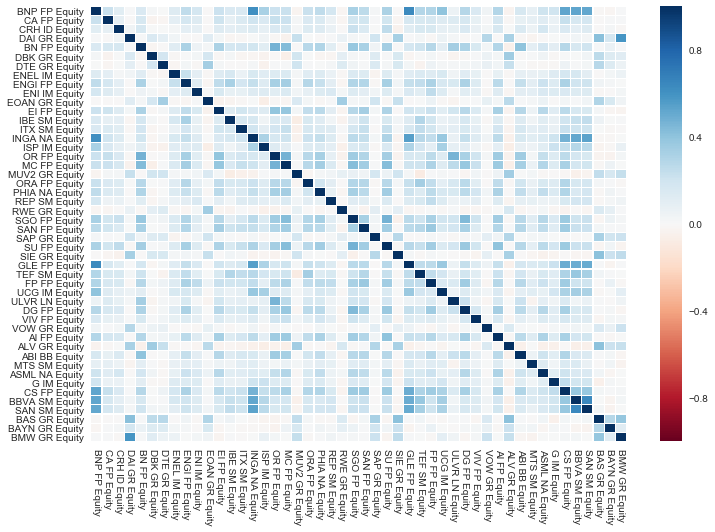

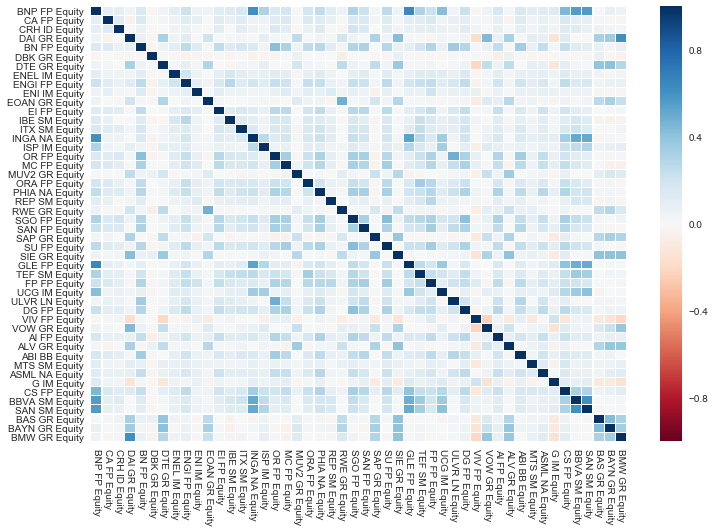

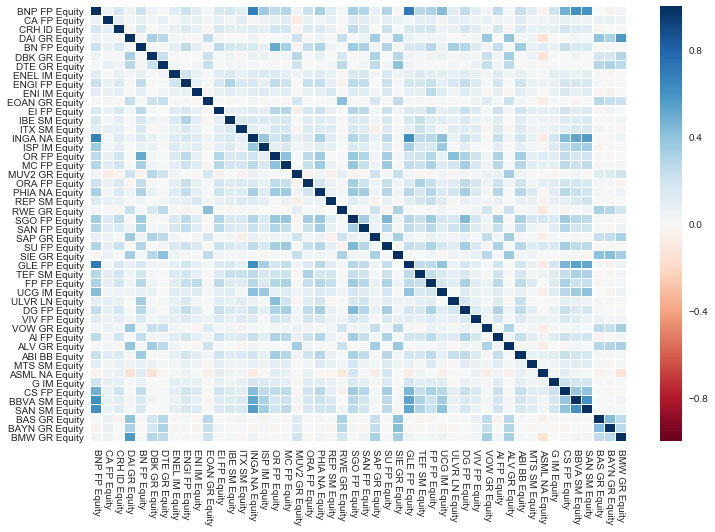

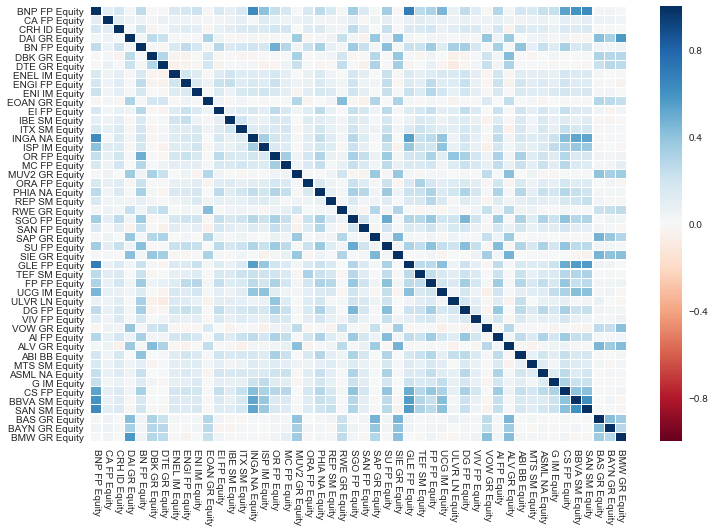

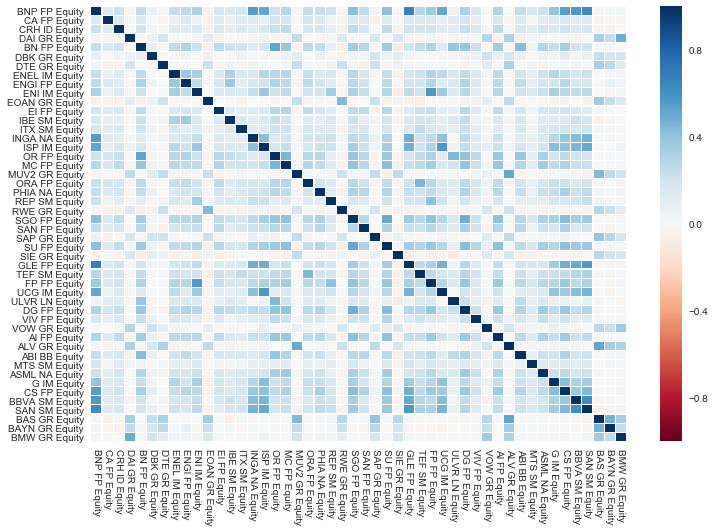

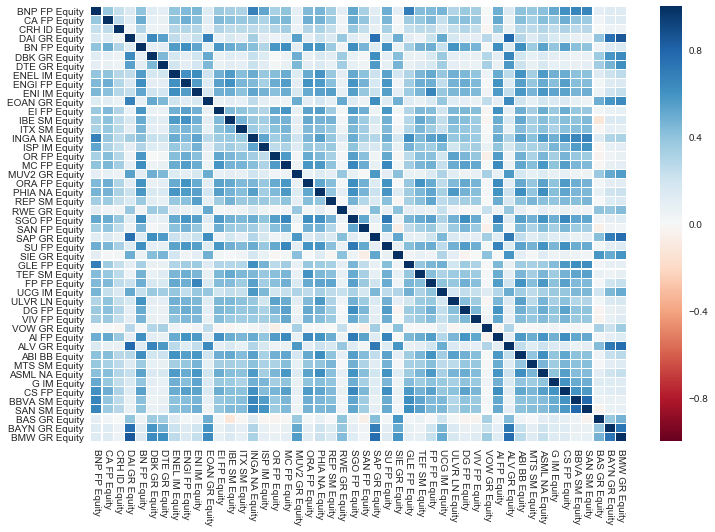

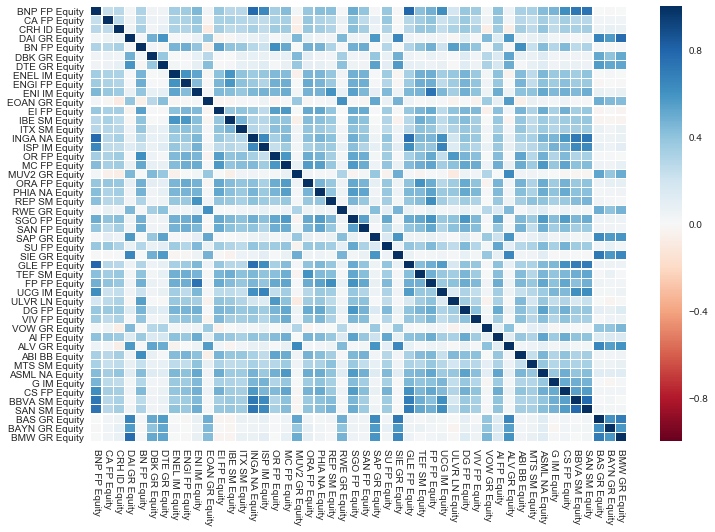

In [39]:
for w in log_rtn['Week'].unique():
    weeklyData = log_rtn[log_rtn['Week'] == w]
    weekCorr = weeklyData.corr()
    weekCorr = weekCorr.iloc[:-2,:-2]

    plt.figure(figsize=(12,8))
    sns.heatmap(weekCorr, 
                linewidths=0.1, 
                cmap="RdBu", 
                vmin=-1, 
                vmax=1, 
                annot=False)

    plt.xticks(rotation=270);
    pyl.savefig("Instant{:03}.jpg".format(w), bbox_inches='tight')
    #pyl.savefig('foo.jpg', bbox_inches='tight')

We can observe a pretty huge swing in stock correlation in the last two weeks of the observed time frame!

## Daily Correlation

What about daily correlation? Does it keep changing too?

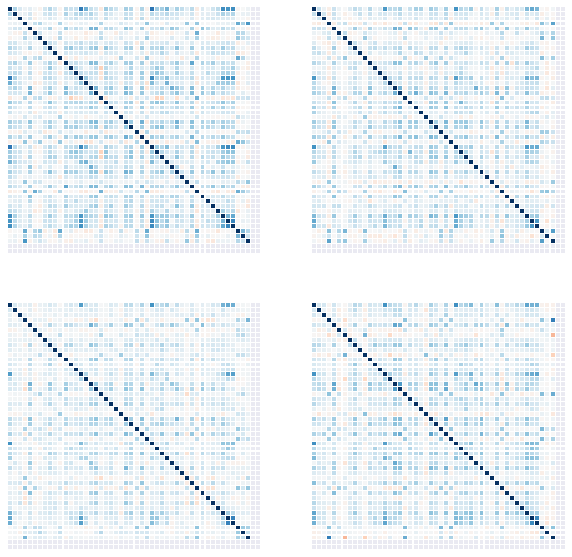

In [286]:
# Week 1
plt.figure(figsize=(10,10))
for i, d in enumerate([2, 3, 4, 5]):
    weeklyData = log_rtn[(log_rtn['Day'] == d) & (log_rtn['Week'] == 1)]
    weekCorr = weeklyData.corr()
    plt.subplot(2, 2, i+1)
    sns.heatmap(weekCorr, 
                linewidths=0.1, 
                cmap="RdBu", 
                vmin=-1, 
                vmax=1, 
                annot=False,
                yticklabels=False,
                xticklabels=False,
                cbar=False)

    plt.xticks(rotation=270);

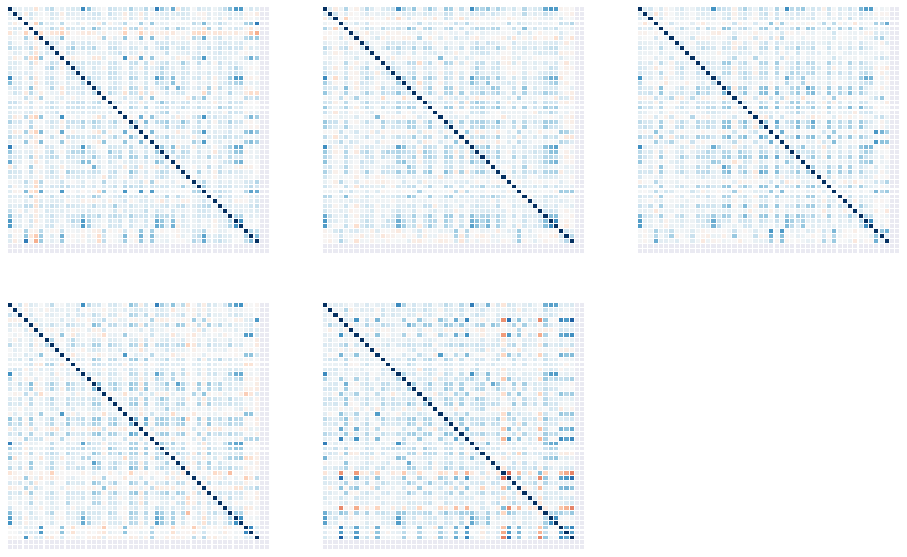

In [288]:
# Week 2
plt.figure(figsize=(16,10))
for i, d in enumerate([8,  9, 10, 11, 12]):
    weeklyData = log_rtn[(log_rtn['Day'] == d) & (log_rtn['Week'] == 2)]
    weekCorr = weeklyData.corr()
    plt.subplot(2, 3, i+1)
    sns.heatmap(weekCorr, 
                linewidths=0.1, 
                cmap="RdBu", 
                vmin=-1, 
                vmax=1, 
                annot=False,
                yticklabels=False,
                xticklabels=False,
                cbar=False)

    plt.xticks(rotation=270);

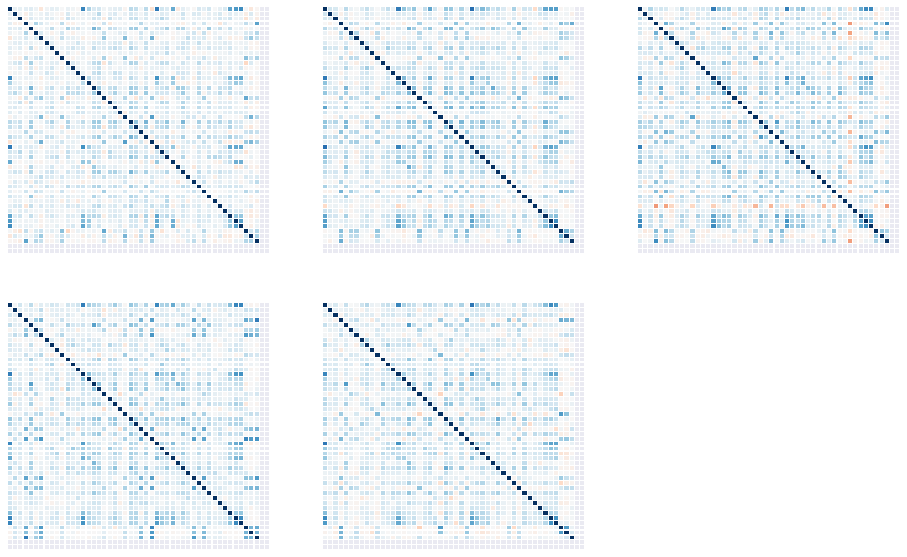

In [289]:
# Week 3
plt.figure(figsize=(16,10))
for i, d in enumerate([15, 16, 17, 18, 19]):
    weeklyData = log_rtn[(log_rtn['Day'] == d) & (log_rtn['Week'] == 3)]
    weekCorr = weeklyData.corr()
    plt.subplot(2, 3, i+1)
    sns.heatmap(weekCorr, 
                linewidths=0.1, 
                cmap="RdBu", 
                vmin=-1, 
                vmax=1, 
                annot=False,
                yticklabels=False,
                xticklabels=False,
                cbar=False)

    plt.xticks(rotation=270);

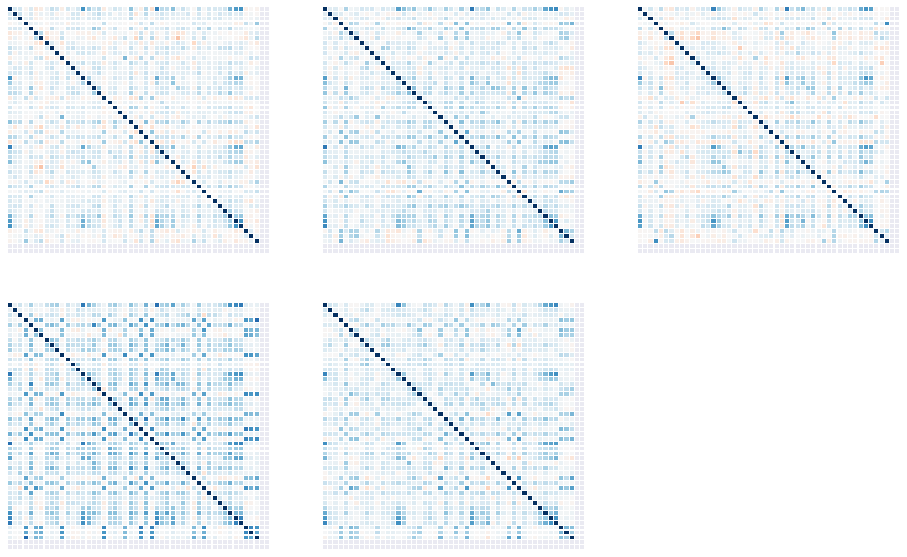

In [290]:
# Week 4
plt.figure(figsize=(16,10))
for i, d in enumerate([22, 23, 24, 25, 26]):
    weeklyData = log_rtn[(log_rtn['Day'] == d) & (log_rtn['Week'] == 4)]
    weekCorr = weeklyData.corr()
    plt.subplot(2, 3, i+1)
    sns.heatmap(weekCorr, 
                linewidths=0.1, 
                cmap="RdBu", 
                vmin=-1, 
                vmax=1, 
                annot=False,
                yticklabels=False,
                xticklabels=False,
                cbar=False)

    plt.xticks(rotation=270);


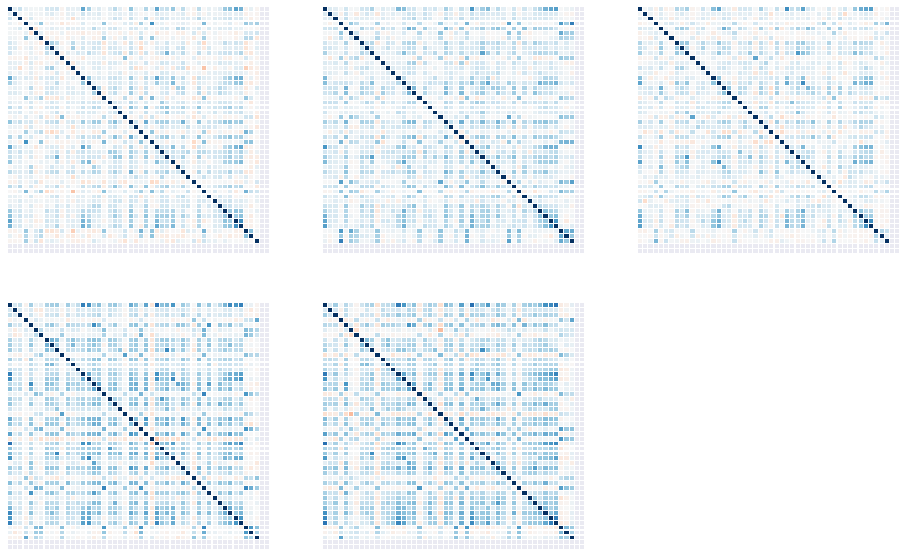

In [301]:
# Week 5
plt.figure(figsize=(16,10))
for i, d in enumerate([29, 30, 31, 1, 2]):
    weeklyData = log_rtn[(log_rtn['Day'] == d) & (log_rtn['Week'] == 5)]
    weekCorr = weeklyData.corr()
    plt.subplot(2, 3, i+1)
    sns.heatmap(weekCorr, 
                linewidths=0.1, 
                cmap="RdBu", 
                vmin=-1, 
                vmax=1, 
                annot=False,
                yticklabels=False,
                xticklabels=False,
                cbar=False)

    plt.xticks(rotation=270);

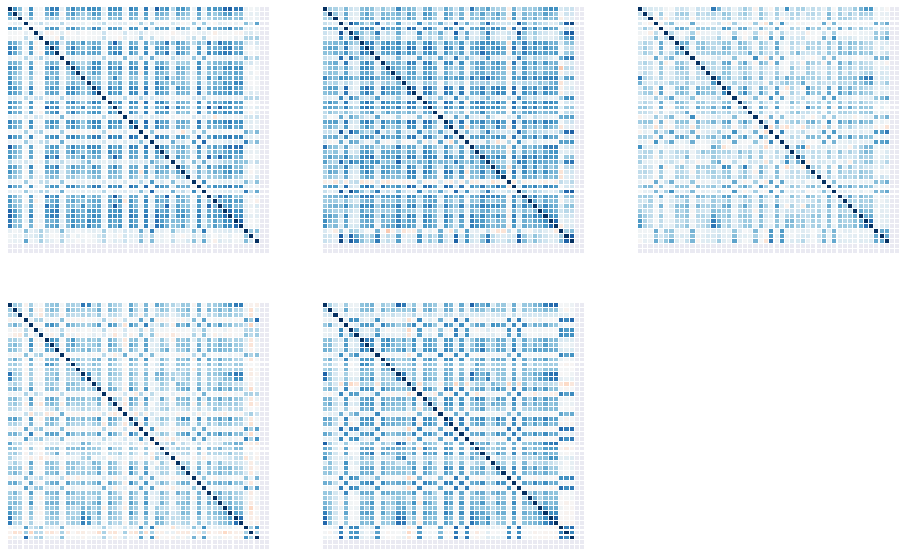

In [304]:
# Week 6
plt.figure(figsize=(16,10))
for i, d in enumerate([5, 6, 7, 8, 9]):
    weeklyData = log_rtn[(log_rtn['Day'] == d) & (log_rtn['Week'] == 6)]
    weekCorr = weeklyData.corr()
    plt.subplot(2, 3, i+1)
    sns.heatmap(weekCorr, 
                linewidths=0.1, 
                cmap="RdBu", 
                vmin=-1, 
                vmax=1, 
                annot=False,
                yticklabels=False,
                xticklabels=False,
                cbar=False)

    plt.xticks(rotation=270);


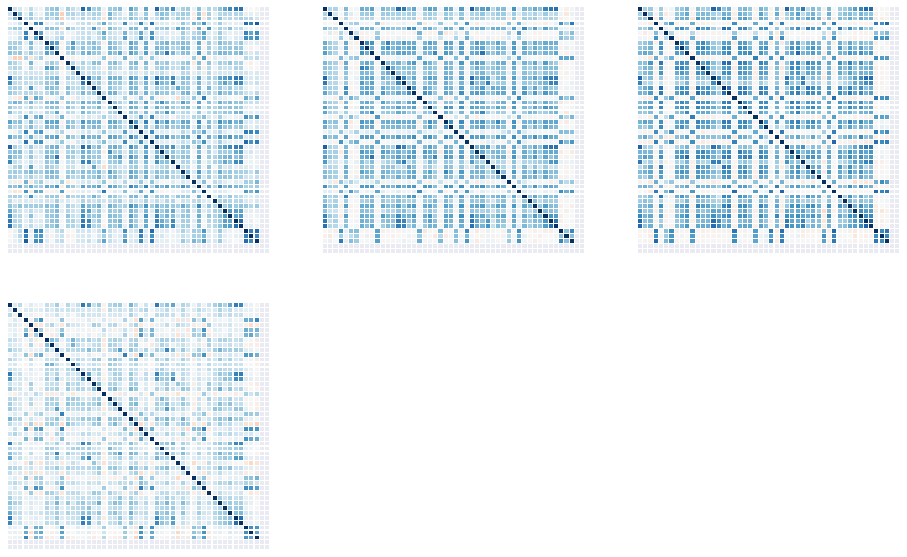

In [306]:
# Week 7
plt.figure(figsize=(16,10))
for i, d in enumerate([12, 13, 14, 15]):
    weeklyData = log_rtn[(log_rtn['Day'] == d) & (log_rtn['Week'] == 7)]
    weekCorr = weeklyData.corr()
    plt.subplot(2, 3, i+1)
    sns.heatmap(weekCorr, 
                linewidths=0.1, 
                cmap="RdBu", 
                vmin=-1, 
                vmax=1, 
                annot=False,
                yticklabels=False,
                xticklabels=False,
                cbar=False)

    plt.xticks(rotation=270);

Try the pairplot solution from the classes

# Linear 

### Computing the linear regression coefficients between each stock for each day 

In [310]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

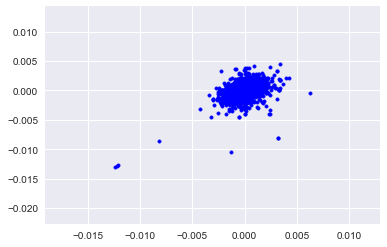

In [309]:
fp = log_rtn['FP FP Equity']
en = log_rtn['ENEL IM Equity']
plt.scatter(fp, en, c='b', marker='.')

In [313]:
eggr = fp.as_matrix()
eggr

array([        nan, -0.00119119,  0.00151581, ...,  0.        ,
        0.        ,  0.        ])

In [316]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(fp.values, en.values)

# The coefficients
print('Coefficients: \n', regr.coef_)

ValueError: Expected 2D array, got 1D array instead:
array=[        nan -0.00119119  0.00151581 ...,  0.          0.          0.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [317]:
# Linear Regression Example

'''
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()'''

# Graph representation 

In [39]:
import networkx as nx
# compute correlation matrix that will be used as adjacent matrix in the graph
corrmat = log_rtn.corr()
corrmat

,BNP FP Equity,CA FP Equity,CRH ID Equity,DAI GR Equity,BN FP Equity,DBK GR Equity,DTE GR Equity,ENEL IM Equity,ENGI FP Equity,ENI IM Equity,...,ABI BB Equity,MTS SM Equity,ASML NA Equity,G IM Equity,CS FP Equity,BBVA SM Equity,SAN SM Equity,BAS GR Equity,BAYN GR Equity,BMW GR Equity
BNP FP Equity,1.000000,0.195633,0.216091,0.093483,0.297344,0.068416,0.056825,0.257615,0.327241,0.309512,...,0.315653,0.261072,0.265749,0.342962,0.559945,0.626248,0.636494,0.049870,0.074417,0.078604
CA FP Equity,0.195633,1.000000,0.164519,0.055075,0.230750,0.032278,0.049797,0.158067,0.224553,0.189881,...,0.209562,0.139417,0.186457,0.152331,0.241564,0.188109,0.189059,0.030039,0.058978,0.055893
CRH ID Equity,0.216091,0.164519,1.000000,0.037355,0.251275,0.030990,0.038265,0.183885,0.214426,0.206399,...,0.243768,0.193814,0.220296,0.160162,0.251509,0.211127,0.221900,0.009180,0.043143,0.041705
DAI GR Equity,0.093483,0.055075,0.037355,1.000000,0.071017,0.430010,0.440523,0.124652,0.078274,0.116810,...,0.163012,0.086901,0.115830,0.061425,0.081828,0.036528,0.043987,0.406677,0.623714,0.755052
BN FP Equity,0.297344,0.230750,0.251275,0.071017,1.000000,0.056225,0.044955,0.323739,0.427657,0.307072,...,0.521046,0.209278,0.341994,0.221564,0.402823,0.273019,0.275140,0.036212,0.072465,0.079942
DBK GR Equity,0.068416,0.032278,0.030990,0.430010,0.056225,1.000000,0.295091,0.056662,0.042358,0.081935,...,0.098980,0.043327,0.065426,0.044839,0.057679,0.030396,0.043086,0.318395,0.395708,0.423520
DTE GR Equity,0.056825,0.049797,0.038265,0.440523,0.044955,0.295091,1.000000,0.069526,0.047727,0.086178,...,0.101865,0.056567,0.077418,0.017066,0.054299,0.045824,0.048945,0.354233,0.409677,0.454508
ENEL IM Equity,0.257615,0.158067,0.183885,0.124652,0.323739,0.056662,0.069526,1.000000,0.396235,0.324832,...,0.330390,0.185709,0.269705,0.243539,0.295549,0.242858,0.252576,0.059346,0.097135,0.117727
ENGI FP Equity,0.327241,0.224553,0.214426,0.078274,0.427657,0.042358,0.047727,0.396235,1.000000,0.312826,...,0.381392,0.222512,0.287198,0.226846,0.375706,0.281410,0.287280,0.021375,0.070047,0.072421
ENI IM Equity,0.309512,0.189881,0.206399,0.116810,0.307072,0.081935,0.086178,0.324832,0.312826,1.000000,...,0.331795,0.266799,0.296119,0.285016,0.328275,0.286448,0.309904,0.029085,0.088742,0.111293


In [40]:
# Transform it in a links data frame (3 columns only):
links = corrmat.stack().reset_index()
links.columns = ['var1', 'var2','value']
links

,var1,var2,value
0,BNP FP Equity,BNP FP Equity,1.000000
1,BNP FP Equity,CA FP Equity,0.195633
2,BNP FP Equity,CRH ID Equity,0.216091
3,BNP FP Equity,DAI GR Equity,0.093483
4,BNP FP Equity,BN FP Equity,0.297344
5,BNP FP Equity,DBK GR Equity,0.068416
6,BNP FP Equity,DTE GR Equity,0.056825
7,BNP FP Equity,ENEL IM Equity,0.257615
8,BNP FP Equity,ENGI FP Equity,0.327241
9,BNP FP Equity,ENI IM Equity,0.309512


In [97]:
print(links_filtered['value'].shape)
print(links_filtered.shape)

(1438,)
(1438, 3)


In [96]:
len(G.edges())

719

In [93]:
print(767 * 2)
print(1486 / 2)

1534
743.0


In [105]:
links_filtered['value'].drop_duplicates().shape

(719,)

In [106]:
719 * 2

1438

In [87]:
links.shape

(2304, 3)

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


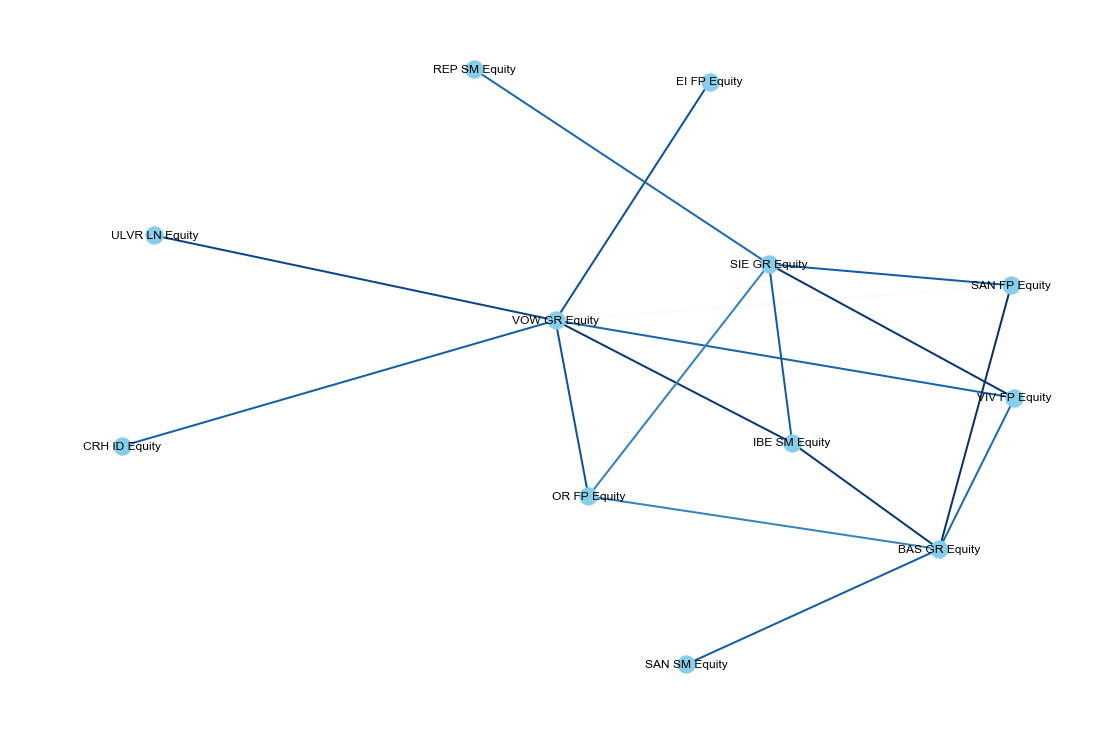

In [118]:
### Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] < 0) & (links['var1'] != links['var2']) ]
links_filtered

# Build your graph
G=nx.from_pandas_dataframe(links_filtered, 'var1', 'var2', create_using=nx.Graph() )

# Plot the network:
# if the graph is not directed you gotta need to drop duplicates in the edge_color cause
# links_filtered['value'] includes A->B and B->A while not directed graph cares only about 
# one between A->B or B->A
plt.figure(figsize=(15,10))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=300, linewidths=1, 
        font_size=12, edge_color=links_filtered['value'].drop_duplicates(), width=2.0, edge_cmap=plt.cm.Blues)

In [112]:
links_filtered.shape

(66, 3)

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


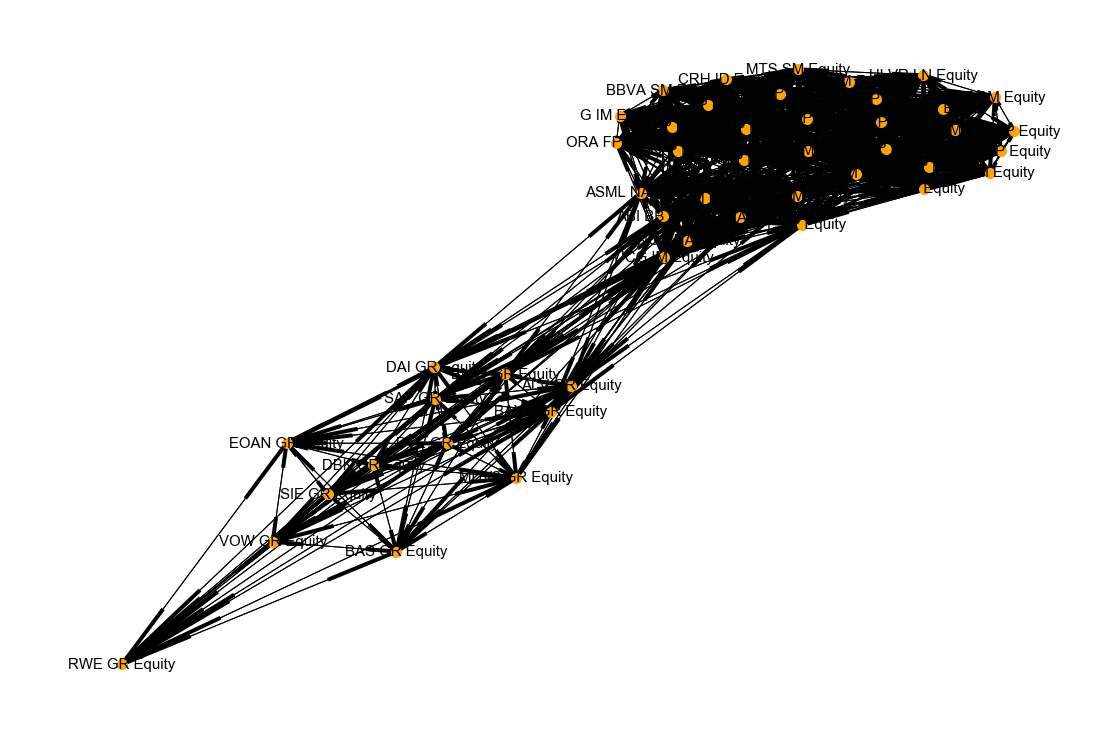

In [52]:
# Build your graph
G=nx.from_pandas_dataframe(links_filtered, 'var1', 'var2', create_using=nx.DiGraph() )

# Plot the network:
plt.figure(figsize=(15,10))
nx.draw(G, with_labels=True, node_color='orange', node_size=100, edge_color='black', linewidths=1, font_size=15)

In [78]:
len(colors)

20

In [81]:
G.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20)]

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


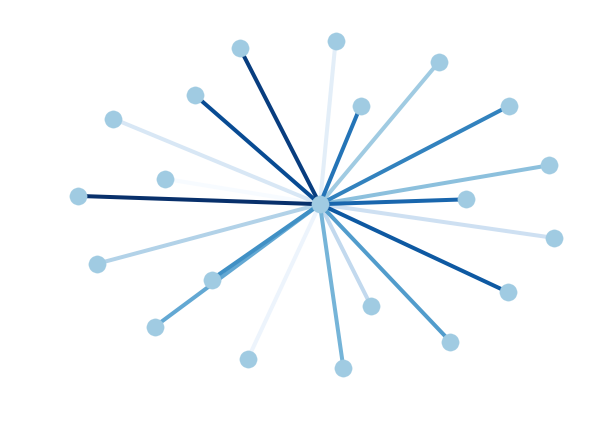

In [74]:
G=nx.star_graph(20)
pos=nx.spring_layout(G)
colors=range(20)
nx.draw(G,pos,node_color='#A0CBE2',edge_color=colors,width=4,edge_cmap=plt.cm.Blues,with_labels=False)
plt.show() # display

In [13]:
#G=nx.Graph()
G=nx.dodecahedral_graph()

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


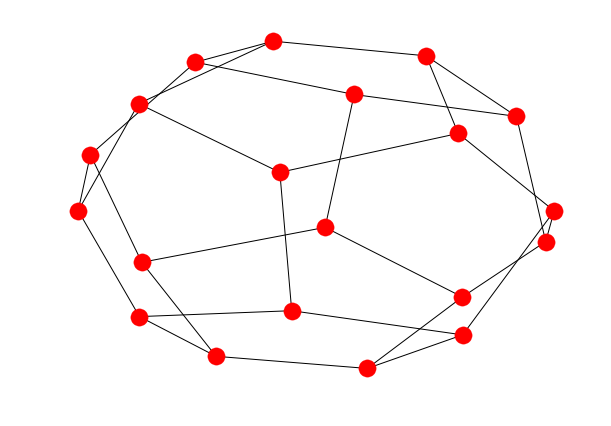

In [14]:
nx.draw(G)

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


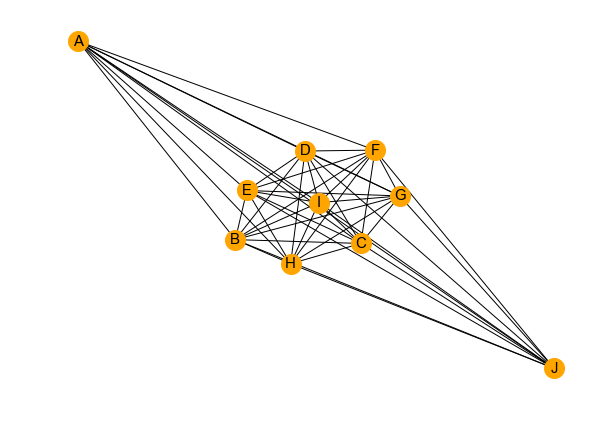

In [38]:
# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
df = pd.DataFrame({ 'A':ind1, 'B':ind1 + np.random.randint(10, size=(10)) , 'C':ind1 + np.random.randint(10, size=(10)) , 'D':ind1 + np.random.randint(5, size=(10)) , 'E':ind1 + np.random.randint(5, size=(10)), 'F':ind5, 'G':ind5 + np.random.randint(5, size=(10)) , 'H':ind5 + np.random.randint(5, size=(10)), 'I':ind5 + np.random.randint(5, size=(10)), 'J':ind5 + np.random.randint(5, size=(10))})
df
 
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = df.corr()
corr
 
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
# links_filtered=links.loc[ (links['value'] > 0)]# & (links['var1'] != links['var2']) ]
links_filtered = links
 
# Build your graph
G=nx.from_pandas_dataframe(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)


In [27]:
links

,var1,var2,value
0,A,A,1.000000
1,A,B,0.663292
2,A,C,0.833426
3,A,D,0.966244
4,A,E,0.924161
5,A,F,-0.409401
6,A,G,-0.326427
7,A,H,-0.329435
8,A,I,-0.419134
9,A,J,-0.598567


In [28]:
corr

,A,B,C,D,E,F,G,H,I,J
A,1.000000,0.663292,0.833426,0.966244,0.924161,-0.409401,-0.326427,-0.329435,-0.419134,-0.598567
B,0.663292,1.000000,0.729615,0.673035,0.573092,-0.346812,-0.196892,-0.366710,-0.381820,-0.445790
C,0.833426,0.729615,1.000000,0.866779,0.755898,-0.506062,-0.393924,-0.456007,-0.585448,-0.596061
D,0.966244,0.673035,0.866779,1.000000,0.866511,-0.474124,-0.395580,-0.378197,-0.488960,-0.648051
E,0.924161,0.573092,0.755898,0.866511,1.000000,-0.378259,-0.345141,-0.337923,-0.393599,-0.579165
F,-0.409401,-0.346812,-0.506062,-0.474124,-0.378259,1.000000,0.979735,0.967820,0.968674,0.966666
G,-0.326427,-0.196892,-0.393924,-0.395580,-0.345141,0.979735,1.000000,0.941809,0.935759,0.944782
H,-0.329435,-0.366710,-0.456007,-0.378197,-0.337923,0.967820,0.941809,1.000000,0.958090,0.919743
I,-0.419134,-0.381820,-0.585448,-0.488960,-0.393599,0.968674,0.935759,0.958090,1.000000,0.928378
J,-0.598567,-0.445790,-0.596061,-0.648051,-0.579165,0.966666,0.944782,0.919743,0.928378,1.000000


In [31]:
df

,A,B,C,D,E,F,G,H,I,J
0,5,8,9,8,7,1,1,1,1,5
1,10,18,19,11,10,1,5,1,1,5
2,3,10,10,6,4,13,15,16,13,17
3,4,13,7,7,4,4,6,7,7,8
4,8,12,8,9,9,18,21,20,19,18
5,10,11,17,12,12,5,6,9,5,7
6,12,21,20,15,14,2,4,3,3,3
7,1,8,6,3,5,11,12,11,13,15
8,9,10,10,10,11,3,3,6,7,5
9,4,13,7,5,8,8,9,8,8,11


In [33]:
links = corr.stack()
links

A  A    1.000000
   B    0.663292
   C    0.833426
   D    0.966244
   E    0.924161
   F   -0.409401
   G   -0.326427
   H   -0.329435
   I   -0.419134
   J   -0.598567
B  A    0.663292
   B    1.000000
   C    0.729615
   D    0.673035
   E    0.573092
   F   -0.346812
   G   -0.196892
   H   -0.366710
   I   -0.381820
   J   -0.445790
C  A    0.833426
   B    0.729615
   C    1.000000
   D    0.866779
   E    0.755898
   F   -0.506062
   G   -0.393924
   H   -0.456007
   I   -0.585448
   J   -0.596061
          ...   
H  A   -0.329435
   B   -0.366710
   C   -0.456007
   D   -0.378197
   E   -0.337923
   F    0.967820
   G    0.941809
   H    1.000000
   I    0.958090
   J    0.919743
I  A   -0.419134
   B   -0.381820
   C   -0.585448
   D   -0.488960
   E   -0.393599
   F    0.968674
   G    0.935759
   H    0.958090
   I    1.000000
   J    0.928378
J  A   -0.598567
   B   -0.445790
   C   -0.596061
   D   -0.648051
   E   -0.579165
   F    0.966666
   G    0.944782
   H    0.9197

In [34]:
links = corr.stack().reset_index()
links

,level_0,level_1,0
0,A,A,1.000000
1,A,B,0.663292
2,A,C,0.833426
3,A,D,0.966244
4,A,E,0.924161
5,A,F,-0.409401
6,A,G,-0.326427
7,A,H,-0.329435
8,A,I,-0.419134
9,A,J,-0.598567


# Kalman Filter

### Computing online-linear regression using kalman filtering

In addition to the Kalman Filter and Kalman Smoother, the KalmanFilter class implements the Expectation-Maximization algorithm. This iterative algorithm is a way to maximize the likelihood of the observed measurements (recall the probabilistic model induced by the model parameters), which is unfortunately a non-convex optimization problem. This means that even when the EM algorithm converges, there is no guarantee that it has converged to an optimal value. Thus it is important to select good initial parameter values.

The KalmanFilter class comes equipped with two algorithms for prediction: the Kalman Filter and the Kalman Smoother. While the former can be updated recursively (making it ideal for online state estimation), the latter can only be done in batch



In [72]:
from pykalman import KalmanFilter
from datetime import datetime, timedelta 

In [54]:
x.shape

(17193,)

In [55]:
x = x[:17190]
x.shape

(17190,)

In [47]:
x = logRtn

In [57]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(x.values)
state_means = pd.Series(state_means.flatten(), index=x.index)

In [58]:
# Compute the rolling mean with various lookback windows
mean30 = logRtn.rolling(window=30).mean()
mean60 = logRtn.rolling(window=60).mean()
mean90 = logRtn.rolling(window=90).mean()

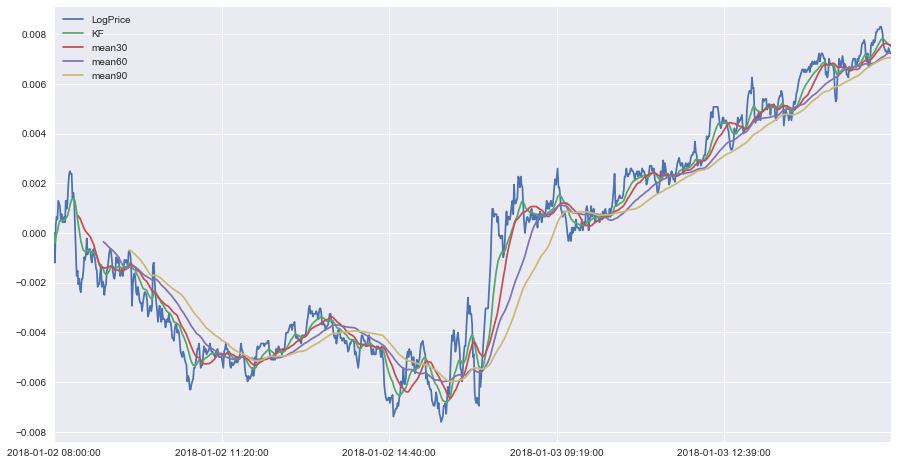

In [88]:
logRtn_ = logRtn[:1000]
state_means_ = state_means[:1000]
mean30_ = mean30[:1000]
mean60_ = mean60[:1000]
mean90_ = mean90[:1000]
plt.figure(figsize=(15,8))
logRtn_.plot()
state_means_.plot()
mean30_.plot()
mean60_.plot()
mean90_.plot()
plt.legend(['LogPrice', 'KF', 'mean30', 'mean60', 'mean90'])

ValueError: could not convert string to float: '2018-02-15 16:37:00'

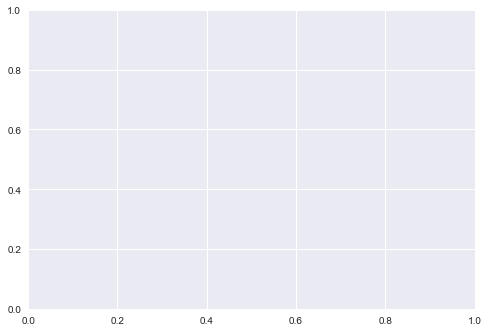

In [56]:
# Plot original data and estimated mean
plt.plot(state_means)
plt.plot(x)
plt.plot(mean30)
plt.plot(mean60)
plt.plot(mean90)
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman Estimate', 'X', '30-day Moving Average', '60-day Moving Average','90-day Moving Average'])
plt.xlabel('Day')
plt.ylabel('Price');

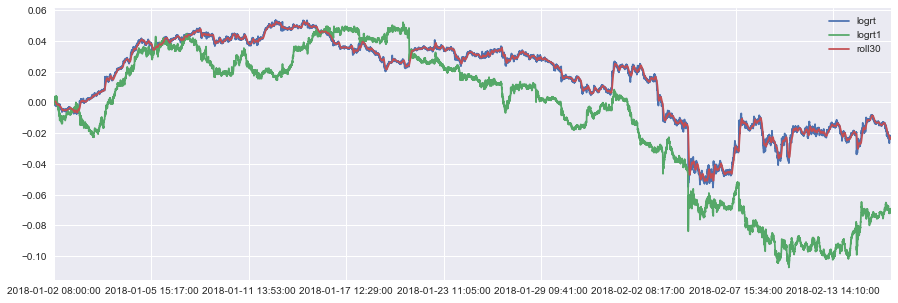

In [46]:
logRtn = np.log(data['FP FP Equity']) - np.log(data['FP FP Equity'].iloc[0])
logRtn1 = np.log(data['ENEL IM Equity']) - np.log(data['ENEL IM Equity'].iloc[0])
roll30 = logRtn.rolling(window=30).mean()
plt.figure(figsize=(15,5))
logRtn.plot(label='logrt', legend=True)
logRtn1.plot(label='logrt1', legend=True)
roll30.plot(label='roll30', legend=True)

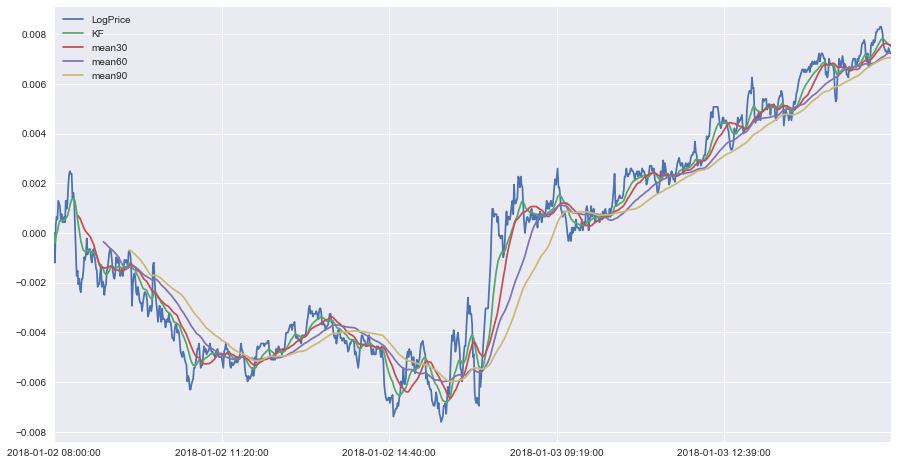

In [101]:
x = logRtn
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(x.values)
state_means = pd.Series(state_means.flatten(), index=x.index)

# Compute the rolling mean with various lookback windows
mean30 = logRtn.rolling(window=30).mean()
mean60 = logRtn.rolling(window=60).mean()
mean90 = logRtn.rolling(window=90).mean()

logRtn_ = logRtn[:1000]
state_means_ = state_means[:1000]
mean30_ = mean30[:1000]
mean60_ = mean60[:1000]
mean90_ = mean90[:1000]
plt.figure(figsize=(15,8))
logRtn_.plot()
state_means_.plot()
mean30_.plot()
mean60_.plot()
mean90_.plot()
plt.legend(['LogPrice', 'KF', 'mean30', 'mean60', 'mean90'])


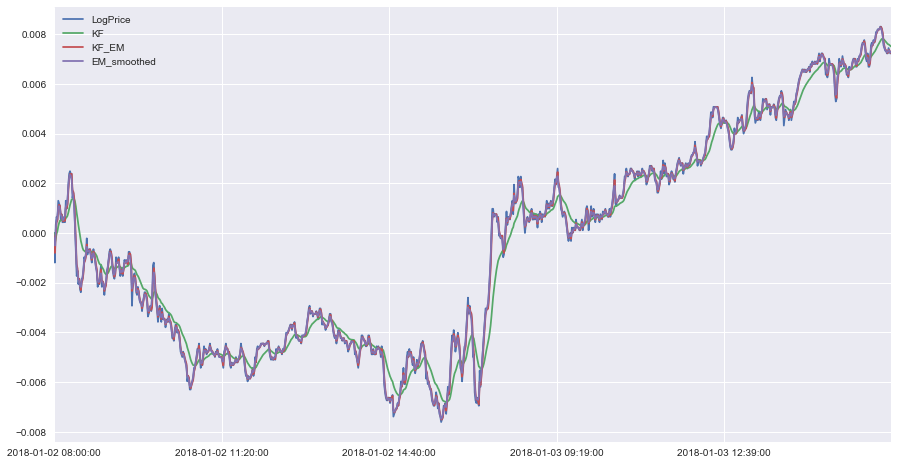

In [105]:
x = logRtn

kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(x.values)
kf = kf.em(x.values, n_iter=10)
(filtered_state_means, filtered_state_covariances) = kf.filter(x.values)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(x.values)


state_means = pd.Series(state_means.flatten(), index=x.index)
filtered_state_means = pd.Series(filtered_state_means.flatten(), index=x.index)
smoothed_state_means = pd.Series(smoothed_state_means.flatten(), index=x.index)

logRtn_ = logRtn[:1000]
state_means_ = state_means[:1000]
smoothed_state_means_ = smoothed_state_means[:1000]
filtered_state_means_ = filtered_state_means[:1000]
plt.figure(figsize=(15,8))
logRtn_.plot()
state_means_.plot()
filtered_state_means_.plot()
smoothed_state_means_.plot()
plt.legend(['LogPrice', 'KF', 'KF_EM', 'EM_smoothed'])


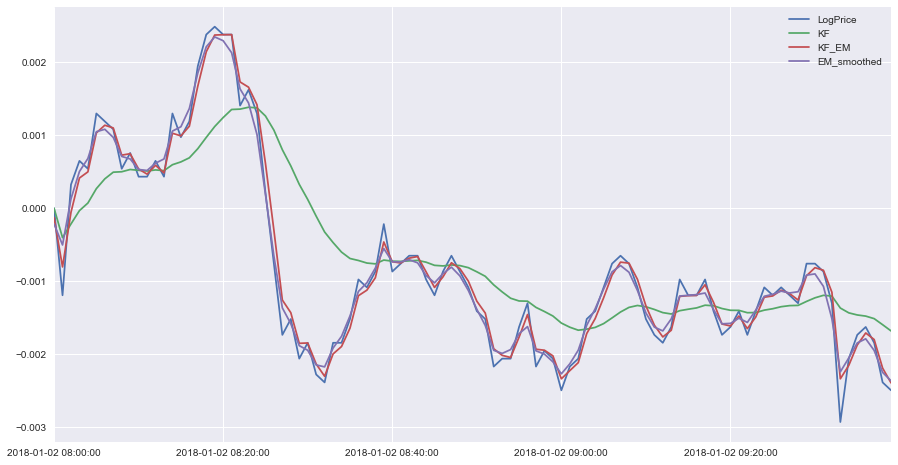

In [106]:
logRtn_ = logRtn[:100]
state_means_ = state_means[:100]
smoothed_state_means_ = smoothed_state_means[:100]
filtered_state_means_ = filtered_state_means[:100]
plt.figure(figsize=(15,8))
logRtn_.plot()
state_means_.plot()
filtered_state_means_.plot()
smoothed_state_means_.plot()
plt.legend(['LogPrice', 'KF', 'KF_EM', 'EM_smoothed'])

(-0.01, 0.01)

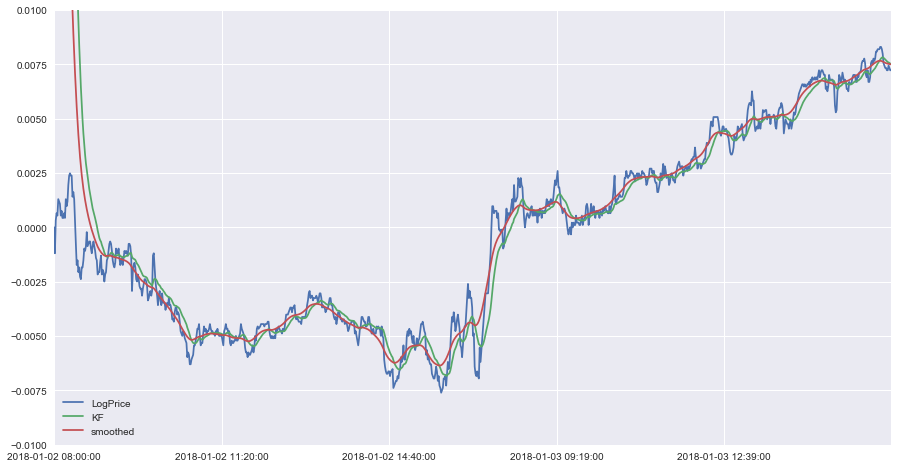

In [132]:
x = logRtn[:1000]

kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(x.values)
#kf = kf.em(x.values, n_iter=5)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(x.values)


state_means = pd.Series(state_means.flatten(), index=x.index)
smoothed_state_means = pd.Series(smoothed_state_means.flatten(), index=x.index)

plt.figure(figsize=(15,8))
x.plot()
state_means.plot()
smoothed_state_means.plot()
plt.legend(['LogPrice', 'KF', 'smoothed'])
plt.ylim([-0.01, 0.01])

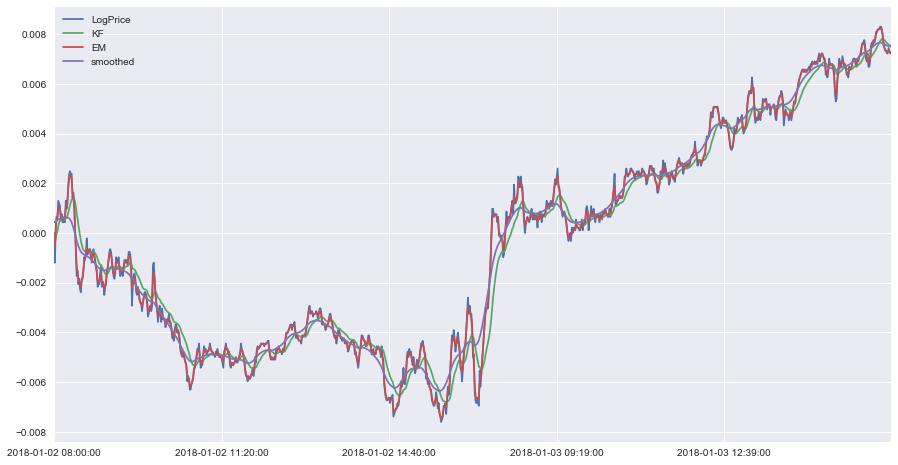

In [137]:
x = logRtn[:1000]

kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = x[0],
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

print(kf.transition_matrices)
# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(x.values)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(x.values)
kf = kf.em(x.values, n_iter=5)
(em_state_means, em_state_covariances) = kf.smooth(x.values)


em_state_means = pd.Series(em_state_means.flatten(), index=x.index)
state_means = pd.Series(state_means.flatten(), index=x.index)
smoothed_state_means = pd.Series(smoothed_state_means.flatten(), index=x.index)

plt.figure(figsize=(15,8))
x.plot()
state_means.plot()
em_state_means.plot()
smoothed_state_means.plot()
plt.legend(['LogPrice', 'KF', 'EM', 'smoothed'])

In [124]:
state_means.head()

2018-01-02 08:00:00    0.000000
2018-01-02 08:01:00   -0.000402
2018-01-02 08:02:00   -0.000215
2018-01-02 08:03:00   -0.000032
2018-01-02 08:04:00    0.000072
dtype: float64

In [171]:
x = logRtn
x.shape

(17193,)

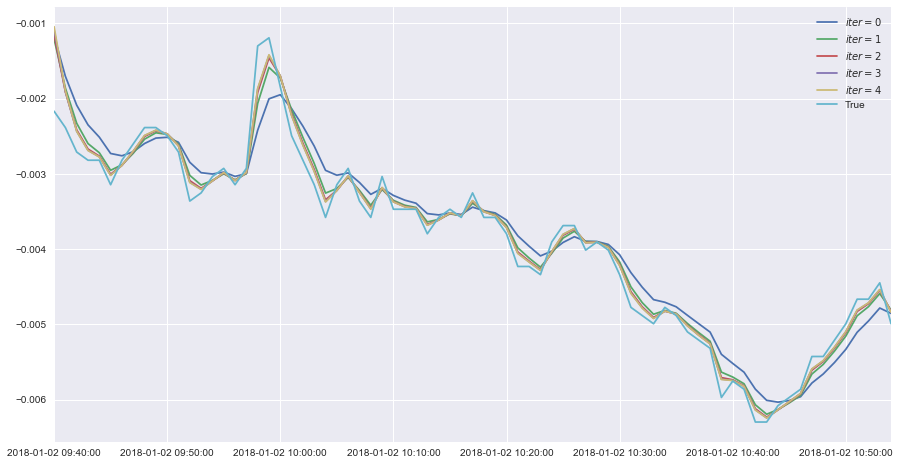

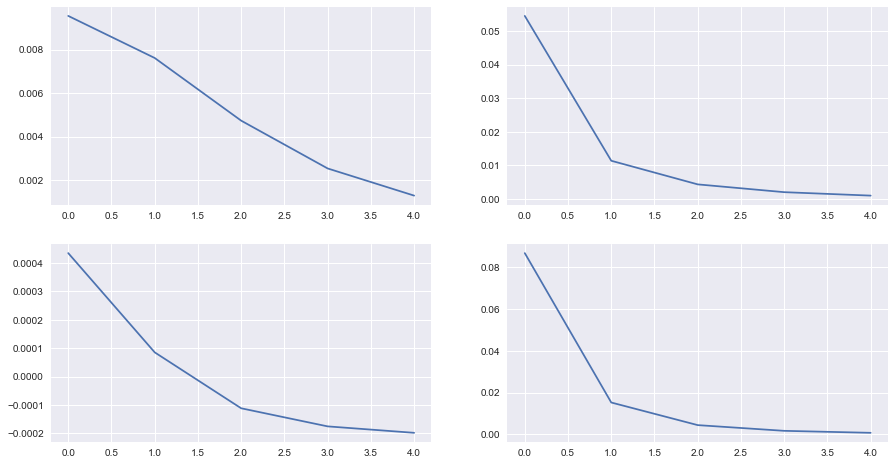

In [180]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = x[0],
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01,
                  em_vars=['transition_covariance', 
                           'observation_covariance',
                           'initial_state_covariance',
                           'initial_state_mean'])
'''
Default EM parameters:
    transition_covariance, 
    observation_covariance,
    initial_state_mean,
    initial_state_covariance'''

tc_updates = np.zeros(5)
oc_updates = np.zeros(5)
im_updates = np.zeros(5)
ic_updates = np.zeros(5)
plt.figure(figsize=(15,8))
for i in range(len(tc_updates)):
    kf = kf.em(x.values[:100], n_iter=1)
    means, _ = kf.filter(x.values[100:])
    tc_updates[i] = kf.transition_covariance
    oc_updates[i] = kf.observation_covariance
    im_updates[i] = kf.initial_state_mean
    ic_updates[i] = kf.initial_state_covariance
    means_ = pd.Series(means.flatten(), index=x.index[100:])
    means_[:75].plot(label='$iter = {i}$'.format(i=i), legend=True)

x[100:175].plot(label='True', legend=True)

plt.figure(figsize=(15,8))
plt.subplot(221)
plt.plot(tc_updates)
plt.subplot(222)
plt.plot(oc_updates)
plt.subplot(223)
plt.plot(im_updates)
plt.subplot(224)
plt.plot(ic_updates)
